# Final Project: Generative AI for Data Science

## Project Scenario

You have been employed as a Data Scientist by a consultancy firm. The firm has a client who is a used car dealer. They have a special feature on Ford cars and they want your firm to design a model that can predict the optimum quotation price for the cars in their lot. They provide you with sales data for the past few years. The dataset contains different features of the cars and the price they were sold at.

The tasks assigned to you are as follows.

1. There might be a few duplicate entries and a few missing values in the dataset. Data cleaning will be a part of the assignment.
2. You have to perform exploratory data analysis to draw keen insights on the data and determine the effect of different features on the price. Some specific requests by the client include:  
    a. Identify number of sales for each fuel type  
    b. Identify which transmission type has more price outliers  
3. Compare the models with linear, polynomial and ridge regressions on single and multiple variables to find the best performing model
4. Perform a Grid Search on the Ridge regression model to identify the optimum hyperparameter for the model for best performance.


## About the Dataset
This dataset contains used car sale prices for Ford cars. This is a public dataset available on the [Kaggle](https://www.kaggle.com/) website as [Ford Car Pricing](https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction) Dataset under the [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) license. The dataset has been slightly modified for the purpose of this project.

Attributes of this dataset have been explained below.  

| Variable |  Description   |
|----------|----------------|
| model	   | Car model name |
| year	   | Year of car make |
| transmission | Type of transmission (Automatic, Manual or Semi-Auto) |
| mileage | Number of miles traveled |
| fuelType | The type of fuel the car uses (Petrol, Diesel, Hybrid, Electric, Other) |
| tax |	Annual Tax payable in USD |
| mpg | Miles per Gallon that the car runs at |
| engineSize | Engine Size of the car |
| price |	Price of car in USD |

In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [2]:
import piplite
await piplite.install(['seaborn'])

In [28]:
import pandas as pd
import numpy as np

# import data from URL
import requests
from io import BytesIO

import seaborn as sns

# machine learning 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

### Importing the data

In [4]:
response = requests.get(URL)
data = BytesIO(response.content)

df = pd.read_csv(data)
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


### Data Preparation

**Prompt 1**  
Write a python code for the following procedures:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.

**Result**  
Here is a Python code that performs the procedures you mentioned:

```python
import pandas as pd

# Create a sample data frame
data = {'A': [1, 2, 3, None, 5],
        'B': [None, 2, 3, 4, 5],
        'C': [1, 2, 3, 4, 5]}
df = pd.DataFrame(data)

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# Replace missing values with mean value of the column
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Delete duplicate entries
df.drop_duplicates(inplace=True)

print("Data frame after replacing missing values and deleting duplicates:")
print(df)
```

This code first identifies the columns of the data frame with missing values, then replaces those missing values with the mean value of the column, and finally deletes any duplicate entries in the data frame.

In [5]:
df.isnull().any()

model           False
year            False
transmission    False
mileage         False
fuelType        False
tax              True
mpg             False
engineSize      False
price           False
dtype: bool

In [6]:
print("Mean value of 'tax' column:", df.tax.mean())
df.fillna(df.tax.mean(), inplace=True)

Mean value of 'tax' column: 113.3291766408729


In [7]:
print("Dimension before remove duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("Dimension after remove duplicates:", df.shape)

Dimension before remove duplicates: (17966, 9)
Dimension after remove duplicates: (17812, 9)


In [8]:
df.to_csv("used_car_price_analysis.csv", index=False)

### Data Insights and Visualization

1. Identify the 5 attributes that have the highest correlation with the `price` parameter.

__Solution:__  
Here is a Python code that can identify 5 attributes of the data frame which have the highest correlations with the "price" parameter:

```python
import pandas as pd

# Assume df is your data frame and 'price' is the target parameter
# Calculate the correlation matrix
correlations = df.corr()

# Sort the correlations with 'price' in descending order and get the top 6 attributes (excluding 'price' itself)
top_correlations = correlations['price'].sort_values(ascending=False)[1:6]

print("Top 5 attributes with the highest correlations with 'price':")
print(top_correlations)
```

This code calculates the correlation matrix of the data frame, sorts the correlations with the "price" parameter in descending order, and then selects the top 5 attributes with the highest correlations with the "price" parameter.

In [9]:
df_no = df.select_dtypes(include='number')
df_no.corr() ['price'].sort_values(ascending=False)

price         1.000000
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64

2. Count the number of cars under each unique value of `fuelType` attribute.

**Solution**  
Certainly! Here is a Python code snippet that counts the number of cars under each unique value of the `fuelType` attribute using pandas:

```python
import pandas as pd

# Assuming you have a DataFrame named 'cars' with a column 'fuelType'
# Replace 'cars' and 'fuelType' with your actual DataFrame and column name

# Count the number of cars under each unique value of 'fuelType'
fuelType_counts = cars['fuelType'].value_counts()

print(fuelType_counts)
```

This code snippet uses the `value_counts()` function from pandas to count the number of occurrences of each unique value in the `fuelType` column of the DataFrame. It then prints out the counts for each unique value.

In [10]:
df.fuelType.value_counts()

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

3. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of `transmission` have more price outliers. Use the Seaborn library for creating the plot.

**Solution**  
Certainly! Here is a Python code snippet that uses the Seaborn library to create a boxplot to determine whether cars with automatic, manual, or semi-auto type of `transmission` have more price outliers:

```python
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named 'cars' with columns 'transmission' and 'price'
# Replace 'cars', 'transmission', and 'price' with your actual DataFrame and column names

# Create a boxplot to visualize the distribution of prices for each type of transmission
sns.boxplot(x='transmission', y='price', data=cars)

# Show the plot
plt.show()
```

This code snippet uses Seaborn's `boxplot()` function to create a boxplot that displays the distribution of prices for each type of transmission. By visualizing the data in this way, you can easily identify which type of transmission has more price outliers.

<AxesSubplot:xlabel='transmission', ylabel='price'>

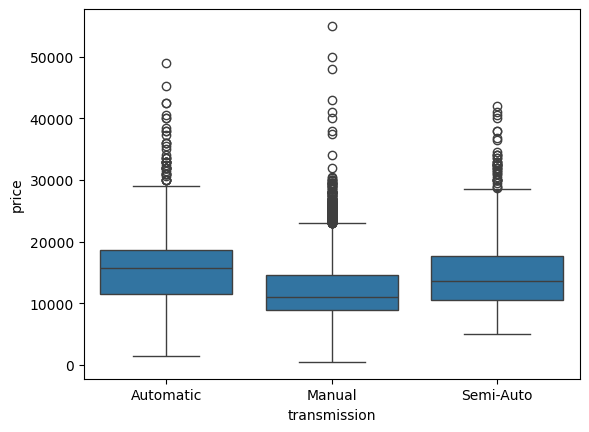

In [11]:
sns.boxplot(x='transmission', y='price', data=df)

4. Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.  

**Solution**  
Certainly! Here is a Python code snippet that uses the Seaborn library to generate a regression plot between the `mpg` parameter and the `price` to determine the correlation type between the two:

```python
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named 'cars' with columns 'mpg' and 'price'
# Replace 'cars', 'mpg', and 'price' with your actual DataFrame and column names

# Create a scatter plot with a regression line
sns.regplot(x='mpg', y='price', data=cars)

# Show the plot
plt.show()
```

This code snippet uses Seaborn's `regplot()` function to create a scatter plot with a regression line that shows the relationship between the `mpg` parameter and the `price`. By examining the slope of the regression line, you can determine the type of correlation between the two variables (positive, negative, or no correlation).

<AxesSubplot:xlabel='mpg', ylabel='price'>

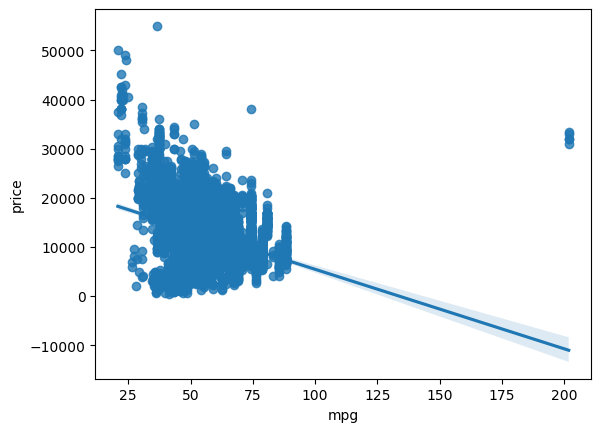

In [12]:
sns.regplot(x='mpg', y='price', data=df)

### Model Development and Evaluation

1. Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

__Solution__  
Certainly! Here is a sample Python code that fits a linear regression model to predict the price using the feature mpg and calculates the R^2 and MSE values:

```python
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Define the feature and target variables
X = data[['mpg']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value: ", r2)
print("MSE value: ", mse)
```

You can replace 'your_dataset.csv' with the actual file path of your dataset containing the 'mpg' and 'price' columns. This code will fit a linear regression model, make predictions, and calculate the R^2 and MSE values for evaluating the model's performance.

In [13]:
X = df[['mpg']]
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 value: ", r2)
print("MSE value: ", mse)

R2alue:  0.12219639678477545
MSE value:  20046361.34101074


2. Fit a linear regression model to predict the `price` using the following set of features; `year`, `mileage`, `tax`, `mpg` and `engineSize`.  
Calculate the R^2 and MSE values for this model.

__Solution__  
Certainly! Here is a sample Python code that fits a linear regression model on a target variable based on a set of source variables and calculates the R^2 and MSE values for the model:

```python
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('your_dataset.csv')

# Define the source variables (X) and target variable (y)
X = data[['source_var1', 'source_var2', 'source_var3']]  # Add more source variables as needed
y = data['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2: ", r2)
print("MSE: ", mse)
```

You can replace 'your_dataset.csv' with the actual file path of your dataset containing the source variables and target variable. This code will fit a linear regression model, make predictions, and calculate the R^2 and MSE values for evaluation.

In [19]:
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=32)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 value: ", r2)
print("MSE value: ", mse)

R2alue:  0.7509576520973767
MSE value:  5687368.879534699


3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

__Solution__  
To create a pipeline model object with standard scalar, second degree polynomial features, and a linear regression model, you can use the following code in Python:

```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Fit the pipeline on your data
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

print("R^2 value:", r2)
print("MSE value:", mse)
```

This code snippet creates a pipeline object with a standard scaler, second degree polynomial features, and a linear regression model. It then fits the pipeline on the training data, makes predictions on the test data, and calculates the R^2 value and MSE value for the model.

In [22]:
pipeline = Pipeline([('scaler', StandardScaler()), 
                    ('polynomial', PolynomialFeatures(degree=2)), 
                    ('linear_reg', LinearRegression())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 value: ", r2)
print("MSE value: ", mse)

R2alue:  0.7769538406880314
MSE value:  5093695.091834887


4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

__Solution__  
To split the data into training and testing parts with the testing part being 20%, you can use the following code snippet in Python:

```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

This code will split your data into training and testing sets with 80% of the data used for training and 20% for testing.

To create and fit a Ridge regression object with a regularization parameter of 0.1 using the training data, you can use the following code:

```python
from sklearn.linear_model import Ridge

# Create and fit the Ridge regression object
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)

# Make predictions
predictions = ridge_reg.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, predictions)

print("R^2 value for Ridge regression model:", r2)
```

This code snippet creates a Ridge regression object with a regularization parameter of 0.1, fits it on the training data, makes predictions on the test data, and calculates the R^2 value for the model.

In [24]:
r = Ridge(alpha=0.1)
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R2 value: ", r2)

R2alue:  0.7509567611447465


5. Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

__Solution__  
To perform a second-order polynomial transform on both the training and testing data created earlier, you can use the following code snippet in Python:

```python
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
```

This code will transform both the training and testing data into second-order polynomial features.

Next, to create and fit a Ridge regression object with a regularization parameter of 0.1 using the modified training data, you can use the following code:

```python
from sklearn.linear_model import Ridge

# Create and fit the Ridge regression object with polynomial features
ridge_reg_poly = Ridge(alpha=0.1)
ridge_reg_poly.fit(X_train_poly, y_train)

# Make predictions on the modified test data
predictions_poly = ridge_reg_poly.predict(X_test_poly)

# Calculate R^2 value
r2_poly = r2_score(y_test, predictions_poly)

# Calculate Mean Squared Error (MSE)
mse_poly = mean_squared_error(y_test, predictions_poly)

print("R^2 value for Ridge regression model with polynomial features:", r2_poly)
print("MSE value for Ridge regression model with polynomial features:", mse_poly)
```

This code snippet creates a Ridge regression object with a regularization parameter of 0.1 using the modified training data with second-order polynomial features. It then makes predictions on the modified test data and calculates the R^2 value and MSE for the model.

In [27]:
# Poly --> train_test_split
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X_poly,y, test_size=0.2, random_state=41)

r = Ridge(alpha=0.1)
r.fit(X_train, y_train)
y_pred = r.predict(X_test)

r2_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)

print("R2 value:", r2_poly)
print("MSE value:", mse_poly)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.20728e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R2 value: 0.7650175518245277
MSE value: 5360018.098969803


In [29]:
# train_test_split --> Poly

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

r = Ridge(alpha=0.1)
r.fit(X_train_poly, y_train)
y_pred = r.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)

print("R2 value:", r2_poly)
print("MSE value:", mse_poly)

R2 value: 0.7949279738644134
MSE value: 4677752.658608513


6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

__Solution__  
To perform a Grid Search on Ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross-validation to find the optimum value of alpha, you can use the following code snippet in Python:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the values of alpha to search
alpha_values = [0.01, 0.1, 1, 10, 100]

# Create the Ridge regression object
ridge_reg = Ridge()

# Create a dictionary of parameters to search
parameters = {'alpha': alpha_values}

# Perform Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(ridge_reg, parameters, cv=4)
grid_search.fit(X_train_poly, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']

print("Optimum value of alpha found:", best_alpha)
```

This code snippet performs a Grid Search on the Ridge regression model with the specified values of alpha and 4-fold cross-validation to find the optimum value of alpha to be used for the prediction model. The best alpha value found will be printed as the output.

In [30]:
ridge = Ridge()
parameters = {'alpha': [0.01,0.1,1,10,100]}

gs = GridSearchCV(ridge, parameters, cv=4)
gs.fit(X_train_poly, y_train)

best_alpha = gs.best_params_['alpha']

print("Best alpha value:", best_alpha)

Best alpha value: 100
